In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")  # nice visuals

df=pd.read_csv("imdb_top_1000.csv")

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [6]:
df.describe(include="object")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [1]:
df.describe()

NameError: name 'df' is not defined

In [7]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Top ten movies accroding to IMDB Rating

In [18]:

top10 = df.sort_values("IMDB_Rating", ascending=False).head(9)
top10[["Series_Title", "IMDB_Rating"]]


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
10,The Lord of the Rings: The Fellowship of the Ring,8.8


The highest rated movie is The Shawshank Redemption

Top ten movies accroding to the meta score

In [19]:

top10 = df.sort_values("Meta_score", ascending=False).head(9)
top10[["Series_Title", "Meta_score"]]


,Series_Title,Meta_score
440,Sweet Smell of Success,100.0
81,Rear Window,100.0
50,Casablanca,100.0
260,Trois couleurs: Rouge,100.0
559,Notorious,100.0
274,Fanny och Alexander,100.0
423,Il conformista,100.0
1,The Godfather,100.0
491,Boyhood,100.0


All of these movies have 100 Meta_score

### Top genres


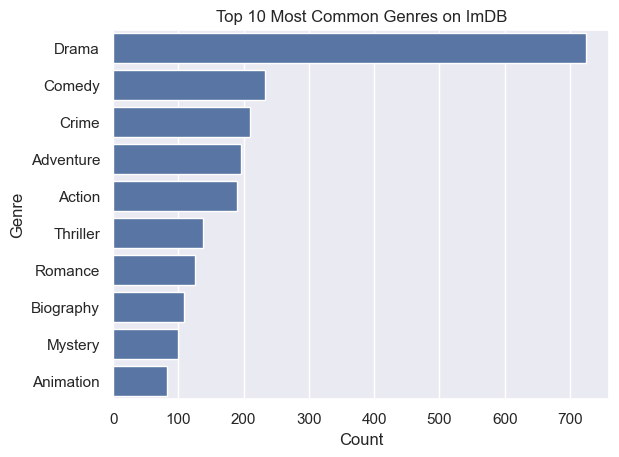

In [21]:
from collections import Counter

# Combine all genres
genre_series = df['Genre'].dropna().apply(lambda x: x.split(', '))
all_genres = sum(genre_series.tolist(), [])
top_genres = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
sns.barplot(data=genres_df, x='Count', y='Genre')
plt.title('Top 10 Most Common Genres on ImDB')
plt.show()


# Duration Distribution

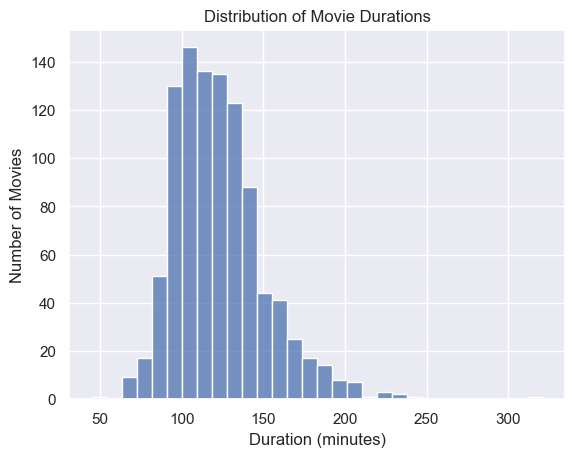

In [22]:
df_movies = df
df_movies['duration_minutes'] = df_movies['Runtime'].str.replace(' min', '').astype(float)

# Plot distribution
sns.histplot(df_movies['duration_minutes'], bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

The average duraiton for a movie is 1:40 hour

# Average IMDB Rating by genre

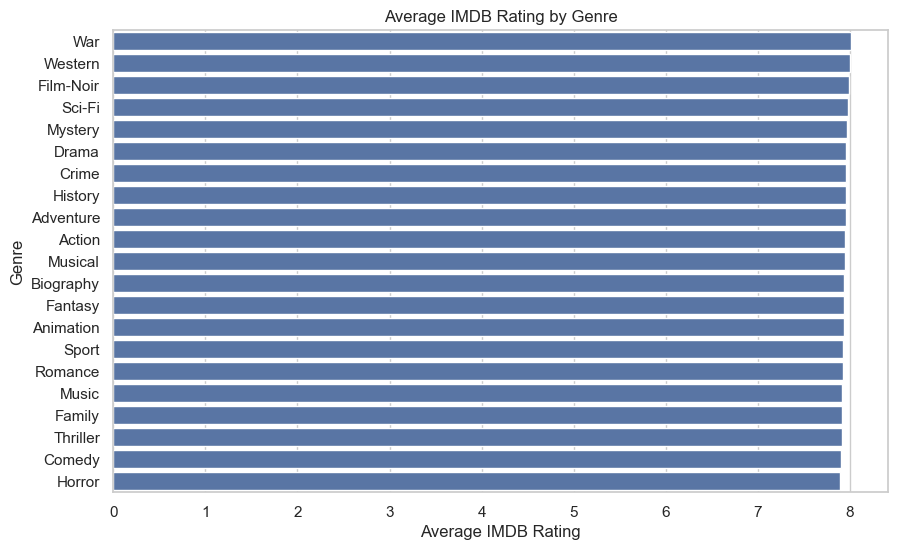

In [38]:

# Split genres and explode
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')

# Group by genre and calculate average IMDB rating
genre_ratings = df_genres.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.xlabel('Average IMDB Rating')
plt.ylabel('Genre')
plt.title('Average IMDB Rating by Genre')
plt.show()

War is the highest while horror is the lowest

# Top ten grossing movies

C:\Users\Seif\AppData\Local\Temp\ipykernel_7868\1466341277.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


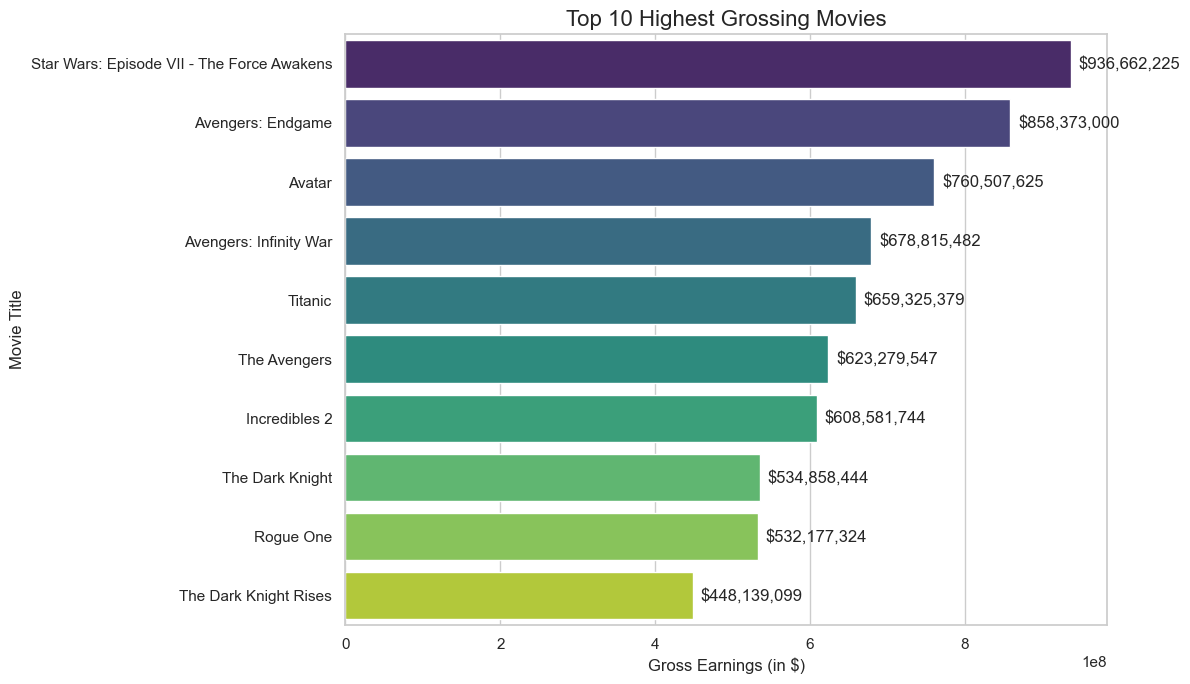

In [36]:

# Get top 10 grossing movies
Top_10_grossing_movies = df.sort_values("Gross", ascending=False).head(10)

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=Top_10_grossing_movies,
    x='Gross',
    y='Series_Title',
    palette='viridis'
)

# Format axes
plt.xlabel('Gross Earnings (in $)', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 10 Highest Grossing Movies', fontsize=16)

# Add value labels
for i, value in enumerate(Top_10_grossing_movies['Gross']):
    barplot.text(value + 1e7, i, f"${value:,.0f}", va='center')

plt.tight_layout()
plt.show()


# Top 5 directors with highest average IMDb rating

C:\Users\Seif\AppData\Local\Temp\ipykernel_7868\1791553809.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


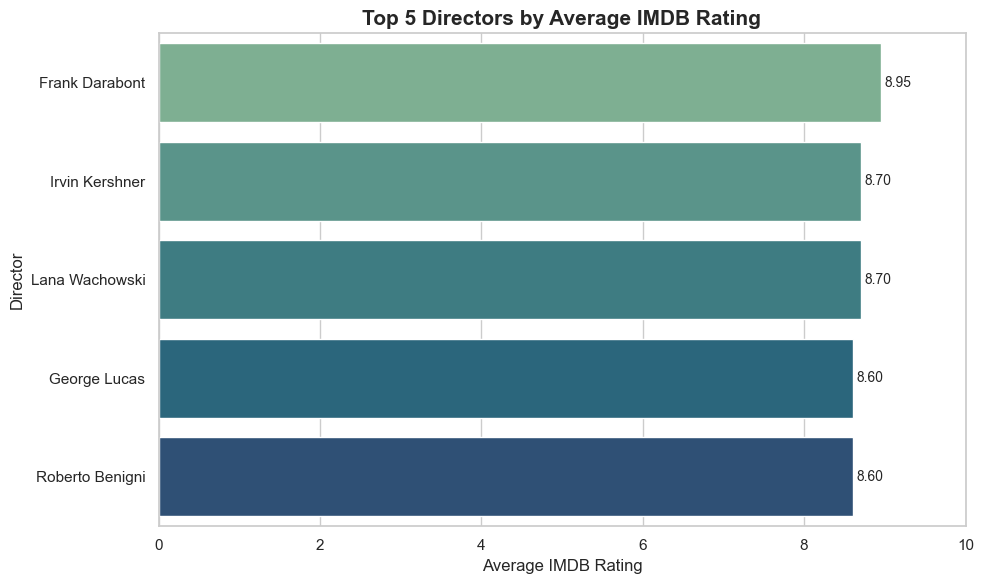

In [41]:
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)

# Reset index for plotting
top_directors = top_directors.reset_index()

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create barplot
barplot = sns.barplot(
    data=top_directors,
    x='IMDB_Rating',
    y='Director',
    palette='crest'
)

# Add value labels to bars
for i, rating in enumerate(top_directors['IMDB_Rating']):
    barplot.text(rating + 0.05, i, f"{rating:.2f}", va='center', fontsize=10)

# Customize labels and title
plt.xlabel('Average IMDB Rating')
plt.ylabel('Director')
plt.title('Top 5 Directors by Average IMDB Rating', fontsize=15, weight='bold')
plt.xlim(0, 10)  # Optional, IMDB rating max = 10
plt.tight_layout()
plt.show()

Frank Darabont is the highest Director with 8.95